In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt

import data
from models import random_forest_pcc
from modules.experiments import ActiveLearningExperiment, error, hamming_loss, NegLogLikelihoodEvaluator
from plotting import plot_active_learning_phase_diagrams

x = data.x
y = data.y.filter(['sphere', 'worm', 'vesicle', 'other'], axis=1).replace(-1, 0)

## HPMA / CysMA

In [2]:
query1 = (data.x['core_HPMA'] == 1) & (data.x['corona_CysMA'] == 1)
x[query1][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
199,50,10.0,31,0.0,7.0,1,70
200,100,10.0,31,0.0,7.0,1,70
201,150,10.0,31,0.0,7.0,1,70
202,200,10.0,31,0.0,7.0,1,70
203,250,10.0,31,0.0,7.0,1,70
204,300,10.0,31,0.0,7.0,1,70
205,100,15.0,31,0.0,7.0,1,70
206,125,15.0,31,0.0,7.0,1,70
207,150,15.0,31,0.0,7.0,1,70
208,175,15.0,31,0.0,7.0,1,70


In [3]:
# WARNING: computation time around 3.5m

exp1 = ActiveLearningExperiment(random_forest_pcc, x[~query1], x[query1], y[~query1], y[query1], 21, evaluators=[hamming_loss, error])
exp1.run()

.....................


In [4]:
exp1.results_

,round,train_hamming loss,test_hamming loss,train_error,test_error,full_test_hamming loss,full_test_error
0,0,0.0,0.375000,0.0,0.772727,0.375000,0.772727
1,1,0.0,0.261905,0.0,0.619048,0.250000,0.590909
2,2,0.0,0.262500,0.0,0.550000,0.238636,0.500000
3,3,0.0,0.197368,0.0,0.473684,0.170455,0.409091
4,4,0.0,0.152778,0.0,0.388889,0.125000,0.318182
5,5,0.0,0.073529,0.0,0.235294,0.056818,0.181818
6,6,0.0,0.078125,0.0,0.250000,0.056818,0.181818
7,7,0.0,0.066667,0.0,0.200000,0.045455,0.136364
8,8,0.0,0.071429,0.0,0.214286,0.045455,0.136364
9,9,0.0,0.038462,0.0,0.153846,0.022727,0.090909


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


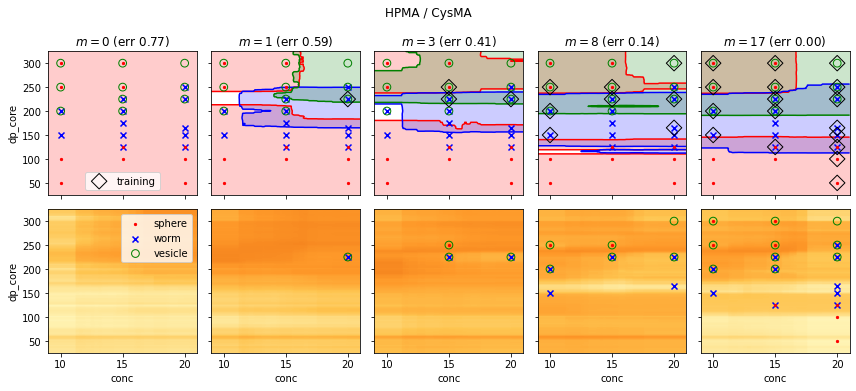

In [5]:
# WARNING: computation time around 40s

plot_active_learning_phase_diagrams(exp1, [0, 1, 3, 8, 17])
plt.suptitle('HPMA / CysMA')
from common import OUTPUTPATH
plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_CysMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

## MEMA / GMA

In [6]:
query2 = (data.x.core_MEMA == 1) & (data.x.corona_GMA == 1)
x[query2][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
424,30,10.0,29,0.0,3.5,0,70
425,35,10.0,29,0.0,3.5,0,70
426,38,10.0,29,0.0,3.5,0,70
427,43,10.0,29,0.0,3.5,0,70
428,58,10.0,29,0.0,3.5,0,70
429,70,10.0,29,0.0,3.5,0,70
430,74,10.0,29,0.0,3.5,0,70
431,78,10.0,29,0.0,3.5,0,70
432,84,10.0,29,0.0,3.5,0,70
433,89,10.0,29,0.0,3.5,0,70


In [7]:
# WARNING: computation time around 2:30m

exp2 = ActiveLearningExperiment(random_forest_pcc, x[~query2], x[query2], y[~query2], y[query2], 25)
exp2.run()

.........................


In [8]:
exp2.results_

,round,train_error,test_error,full_test_error
0,0,0.0,0.730769,0.730769
1,1,0.0,0.720000,0.692308
2,2,0.0,0.875000,0.807692
3,3,0.0,0.956522,0.846154
4,4,0.0,0.727273,0.615385
5,5,0.0,0.619048,0.500000
6,6,0.0,0.450000,0.346154
7,7,0.0,0.368421,0.269231
8,8,0.0,0.166667,0.115385
9,9,0.0,0.294118,0.192308


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


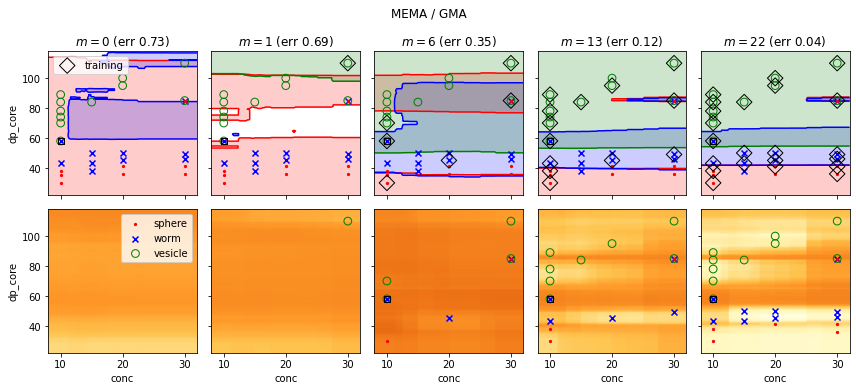

In [9]:
plot_active_learning_phase_diagrams(exp2, [0, 1, 6, 13, 22])
plt.suptitle('MEMA / GMA')
plt.savefig(os.path.join(OUTPUTPATH, 'MEMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

## HPMA / GMA

In [10]:
query3 = (data.x.core_HPMA == 1) & (data.x.corona_GMA == 1) & (data.x.dp_corona==78) & (data.x.salt==0) & (data.x.ph==7) & (data.x.charged==0) & (data.x.temp==70)
sum(query3), sum(~query3)

(44, 548)

In [11]:
exp3 = ActiveLearningExperiment(random_forest_pcc, x[~query3], x[query3], y[~query3], y[query3], 43)
exp3.run()

...........................................


In [12]:
exp3.results_

,round,train_error,test_error,full_test_error
0,0,0.0,0.772727,0.772727
1,1,0.0,0.720930,0.704545
2,2,0.0,0.642857,0.613636
3,3,0.0,0.682927,0.636364
4,4,0.0,0.675000,0.613636
5,5,0.0,0.641026,0.568182
6,6,0.0,0.578947,0.500000
7,7,0.0,0.540541,0.454545
8,8,0.0,0.416667,0.340909
9,9,0.0,0.514286,0.409091


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


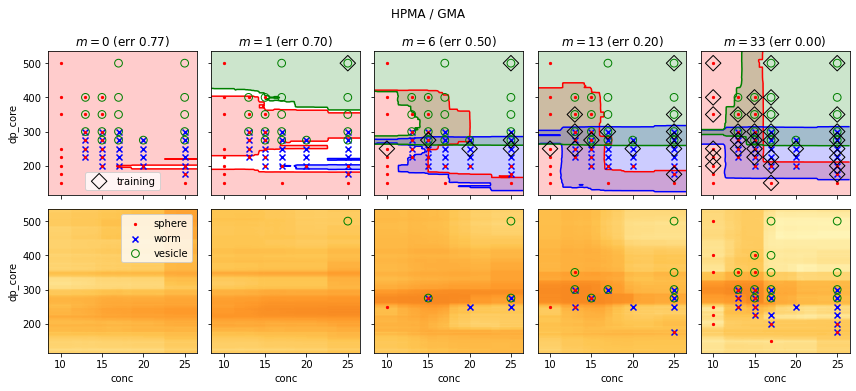

In [13]:
plot_active_learning_phase_diagrams(exp3, [0, 1, 6, 13, 33])
plt.suptitle('HPMA / GMA')
plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


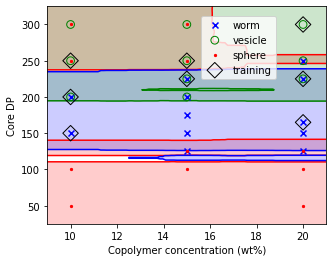

In [14]:
from plotting import x_grid_data_around_sample, plot_marginal_morphology_contours, scatter_phases, SCATTER_STYLE_TRAINING
from common import OUTPUTPATH
import os

plt.figure(figsize=(5, 4))
xx1, xx2, grid_points = x_grid_data_around_sample(exp1.x_test[0], 'conc', 'dp_core', resolution=100)
pp = exp1.fits[8].predict_proba(grid_points)
plot_marginal_morphology_contours(xx1, xx2, pp)
scatter_phases(exp1.y_test[0], exp1.x_test[0]['conc'], exp1.x_test[0]['dp_core'], other=False)
plt.scatter(exp1.x_train[8][-8:]['conc'], exp1.x_train[8][-8:]['dp_core'], **SCATTER_STYLE_TRAINING)
plt.xlabel('Copolymer concentration (wt%)')
plt.ylabel('Core DP')
plt.legend(loc=(0.55, 2/3))
plt.savefig(os.path.join(OUTPUTPATH, 'phases_8_HPMA_CYSMA.pdf'), bbox_inches='tight', pad_inches=0)
# phases_3_GMA_CYSMA
plt.show()


## GlyMA / GMA

In [15]:
query4 = (data.x.core_GlyMA == 1) & (data.x.corona_GMA == 1)
x[query4][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
311,100,10.0,45,0.0,5.20,0,70
312,100,10.0,45,0.0,7.10,0,70
313,100,10.0,45,0.0,4.50,0,40
314,100,10.0,45,0.0,7.20,0,40
315,100,10.0,45,0.0,4.20,0,50
316,100,10.0,45,0.0,7.10,0,50
317,300,10.0,45,0.0,7.00,0,50
318,400,10.0,45,0.0,7.00,0,50
319,100,10.0,45,0.0,3.00,0,30
327,25,15.0,25,0.0,2.75,0,50


In [16]:
exp4 = ActiveLearningExperiment(random_forest_pcc, x[~query4], x[query4], y[~query4], y[query4], 12)
exp4.run()

............


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


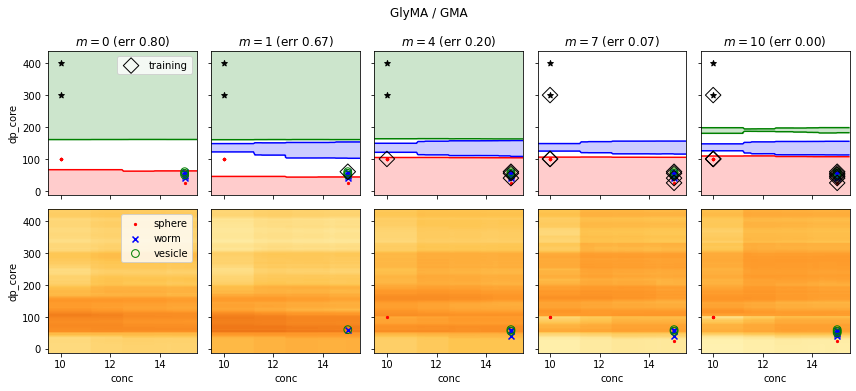

In [17]:
plot_active_learning_phase_diagrams(exp4)
plt.suptitle('GlyMA / GMA')
plt.show()

## BzMA / GMA

In [18]:
query5 = (data.x.core_BzMA == 1) & (data.x.corona_GMA == 1)
x[query5][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
555,50,10.0,51,0.0,7.0,0,70
556,75,10.0,51,0.0,7.0,0,70
557,100,10.0,51,0.0,7.0,0,70
558,125,10.0,51,0.0,7.0,0,70
559,150,10.0,51,0.0,7.0,0,70
560,175,10.0,51,0.0,7.0,0,70
561,200,10.0,51,0.0,7.0,0,70
562,250,10.0,51,0.0,7.0,0,70
563,300,10.0,51,0.0,7.0,0,70
564,400,10.0,51,0.0,7.0,0,70


In [19]:
exp5 = ActiveLearningExperiment(random_forest_pcc, x[~query5], x[query5], y[~query5], y[query5], 12)
exp5.run()


............


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


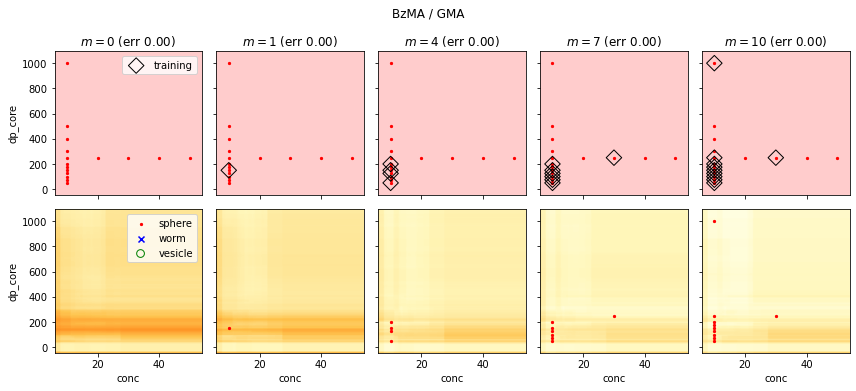

In [20]:
plot_active_learning_phase_diagrams(exp5)
plt.suptitle('BzMA / GMA')
plt.show()

# Combined Figure

/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/Users/yluu0028/Documents/GitHub/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


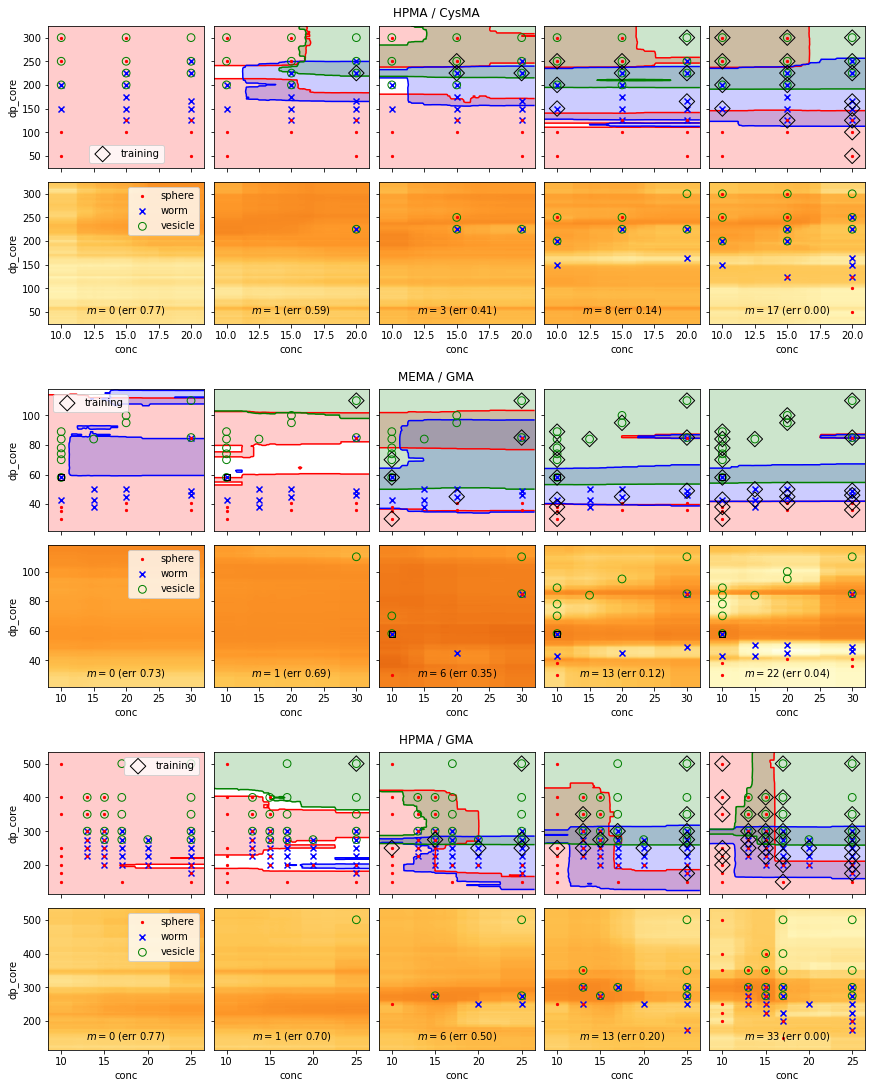

In [22]:
from plotting import plot_active_learning_phase_diagrams, x_grid_data_around_sample, scatter_phases, SCATTER_STYLE_TRAINING, SCATTER_STYLE_WORM, SCATTER_STYLE_SPHERE, SCATTER_STYLE_VESICLE, plot_marginal_morphology_contours
from scipy.stats import entropy

def plot_active_learning_phase_diagrams2(exp, k = [0, 1, 4, 7, 10], fig=None, resolution=100, inline_titles=False, verbose=True):
    fig = plt.figure(figsize=(len(k)*12/5, 5.5), constrained_layout=True, tight_layout=True) if fig is None else fig
    # figsize = (len(k)*12/5, 5.5) if figsize is None else figsize
    axs = fig.subplots(2, len(k), sharex=True, sharey=True)
    xx1, xx2, grid_points = x_grid_data_around_sample(exp.x_test[0], 'conc', 'dp_core', resolution=resolution)

    for j in range(len(k)):
        if verbose:
            print('.', end='')
        yy_hat = exp.fits[k[j]].predict_proba(grid_points)
        plot_marginal_morphology_contours(xx1, xx2, yy_hat, ax=axs[0, j])
        scatter_phases(exp.y_test[0], exp.x_test[0]['conc'], exp.x_test[0]['dp_core'], ax=axs[0, j])

        HH = entropy(yy_hat, axis=1).reshape(xx1.shape)
        entropy_cp = axs[1, j].contourf(xx1, xx2, HH, levels=100, cmap='YlOrBr', vmin=0, vmax=2)
        # plt.colorbar(entropy_cp, ax=axs[1, j])
    if verbose:
        print()

    for i in range(1, len(k)):
        axs[0, i].scatter(exp.x_train[k[i]][-k[i]:]['conc'], exp.x_train[k[i]][-k[i]:]['dp_core'], **SCATTER_STYLE_TRAINING)
        scatter_phases(exp.y_train[k[i]][-k[i]:], exp.x_train[k[i]][-k[i]:]['conc'], exp.x_train[k[i]][-k[i]:]['dp_core'], ax=axs[1, i])

    for j in range(len(k)):
        subplot_title = f'$m={k[j]}$ (err ${exp.results_.iloc[k[j]]["full_test_error"]: .2f}$)'
        if inline_titles:
            axs[1, j].text(0.5, 0.05, subplot_title, ha='center', va='bottom', transform=axs[1, j].transAxes)
        else:
            axs[0, j].set_title(subplot_title)
        axs[1, j].set_xlabel('conc')

    axs[0, 0].set_ylabel('dp_core')
    axs[1, 0].set_ylabel('dp_core')

    axs[1, 0].scatter([], [], **SCATTER_STYLE_SPHERE)
    axs[1, 0].scatter([], [], **SCATTER_STYLE_WORM)
    axs[1, 0].scatter([], [], **SCATTER_STYLE_VESICLE)
    axs[1, 0].legend()

    sc_tr = axs[0, 0].scatter([], [], **SCATTER_STYLE_TRAINING)
    axs[0, 0].legend(handles=[sc_tr])
    return fig, axs

fig = plt.figure(figsize=(12, 15), constrained_layout=True)
subfigs = fig.subfigures(3, 1, hspace=0.025)
plot_active_learning_phase_diagrams2(exp1, [0, 1, 3, 8, 17], subfigs[0], inline_titles=True)
subfigs[0].suptitle('HPMA / CysMA')
plot_active_learning_phase_diagrams2(exp2, [0, 1, 6, 13, 22], subfigs[1], inline_titles=True)
subfigs[1].suptitle('MEMA / GMA')
plot_active_learning_phase_diagrams2(exp3, [0, 1, 6, 13, 33], subfigs[2], inline_titles=True)
subfigs[2].suptitle('HPMA / GMA')

plt.savefig(os.path.join(OUTPUTPATH, 'active_learning_combined.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()